In [1]:
import numpy as np
from qiskit.quantum_info import SparsePauliOp, Statevector


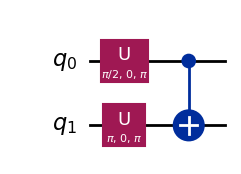

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)
psi = Statevector(qc)
qc.decompose().draw(output='mpl')

In [5]:
psi.draw('latex')


<IPython.core.display.Latex object>

In [7]:
# Check the version of Qiskit
import qiskit
 
qiskit.__version__

'2.2.3'

In [ ]:
# Import the qiskit library
import numpy as np
import matplotlib.pylab as plt

from qiskit import QuantumCircuit
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.primitives import StatevectorEstimator
from qiskit.quantum_info import Statevector, SparsePauliOp
from qiskit.synthesis import (
    SuzukiTrotter,
    LieTrotter,
)

In [8]:
def get_hamiltonian(nqubits, J, h, alpha):
    # List of Hamiltonian terms as 3-tuples containing
    # (1) the Pauli string,
    # (2) the qubit indices corresponding to the Pauli string,
    # (3) the coefficient.
    ZZ_tuples = [("ZZ", [i, i + 1], -J) for i in range(0, nqubits - 1)]
    Z_tuples = [("Z", [i], -h * np.sin(alpha)) for i in range(0, nqubits)]
    X_tuples = [("X", [i], -h * np.cos(alpha)) for i in range(0, nqubits)]
 
    # We create the Hamiltonian as a SparsePauliOp, via the method
    # `from_sparse_list`, and multiply by the interaction term.
    hamiltonian = SparsePauliOp.from_sparse_list(
        [*ZZ_tuples, *Z_tuples, *X_tuples], num_qubits=nqubits
    )
    return hamiltonian.simplify()

n_qubits = 6
 
hamiltonian = get_hamiltonian(nqubits=n_qubits, J=0.2, h=1.2, alpha=np.pi / 8.0)
hamiltonian

SparsePauliOp(['IIIIZZ', 'IIIZZI', 'IIZZII', 'IZZIII', 'ZZIIII', 'IIIIIZ', 'IIIIZI', 'IIIZII', 'IIZIII', 'IZIIII', 'ZIIIII', 'IIIIIX', 'IIIIXI', 'IIIXII', 'IIXIII', 'IXIIII', 'XIIIII'],
              coeffs=[-0.2       +0.j, -0.2       +0.j, -0.2       +0.j, -0.2       +0.j,
 -0.2       +0.j, -0.45922012+0.j, -0.45922012+0.j, -0.45922012+0.j,
 -0.45922012+0.j, -0.45922012+0.j, -0.45922012+0.j, -1.10865544+0.j,
 -1.10865544+0.j, -1.10865544+0.j, -1.10865544+0.j, -1.10865544+0.j,
 -1.10865544+0.j])

In [ ]:
jcm_hamiltonian = SparsePauliOp(['II','ZI','XX','YY'],[0.5,0.5,2*1.414,1] )
jcm_hamiltonian